<a href="https://colab.research.google.com/github/Jessvcv/Data-Science/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mord
!pip install dmba

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=bac8bf598b2a09eb4ed29c541ec6de0951a47b1dffc6cd8de30bc6286bcd4922
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import mord as m
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
%matplotlib inline

Colab environment detected.


In [ ]:
path = "/content/drive/MyDrive/DSC1010_Spring2024/RidingMowers_dataset.csv"
LogReg_df = pd.read_csv(path)

In [ ]:
LogReg_df.head(3)

,Income,Lot_Size,Ownership
0,60.0,18.4,owner
1,85.5,16.8,owner
2,64.8,21.6,owner


In [ ]:
LogReg_df = pd.get_dummies(LogReg_df, prefix_sep='_', drop_first=True)
y = LogReg_df['Ownership_owner']
x = LogReg_df.drop(columns=['Ownership_owner'])
LogReg_df

,Income,Lot_Size,Ownership_owner
0,60.0,18.4,True
1,85.5,16.8,True
2,64.8,21.6,True
3,61.5,20.8,True
4,87.0,23.6,True
5,110.1,19.2,True
6,108.0,17.6,True
7,82.8,22.4,True
8,69.0,20.0,True
9,93.0,20.8,True


In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_x, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=x.columns).transpose())

intercept  -15.432245020237266
        Income  Lot_Size
coeff  0.08555  0.510334


In [ ]:
logit_reg_pred = logit_reg.predict(valid_x)
logit_reg_proba = logit_reg.predict_proba(valid_x)
logit_result = pd.DataFrame({'actual': valid_y,'p(0)': [p[0] for p in logit_reg_proba],'p(1)': [p[1] for p in logit_reg_proba],'predicted': logit_reg_pred })

In [ ]:
print(logit_result)

    actual      p(0)      p(1)  predicted
13   False  0.574509  0.425491      False
18   False  0.898917  0.101083      False
3     True  0.390786  0.609214       True
14   False  0.752292  0.247708      False
20   False  0.952921  0.047079      False
17   False  0.903899  0.096101      False
10    True  0.460547  0.539453       True
4     True  0.017049  0.982951       True
2     True  0.243314  0.756686       True
19   False  0.597682  0.402318      False


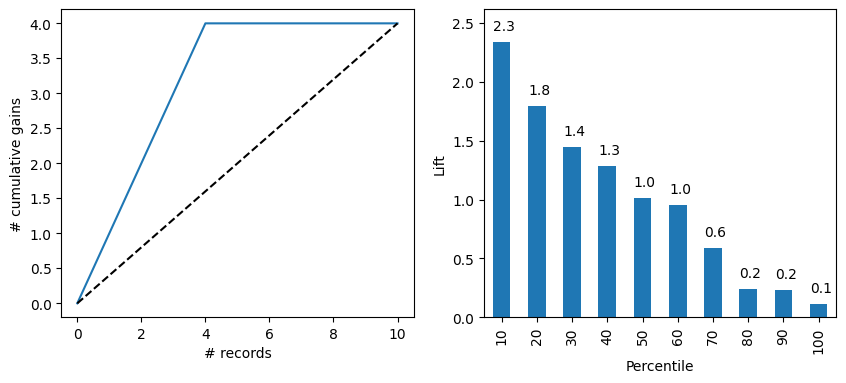

In [ ]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [ ]:
print("\nValidation Set: Confusion matrix\n")
classificationSummary(valid_y, logit_reg_pred)


Validation Set: Confusion matrix

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual 0 1
     0 6 0
     1 0 4
